In [3]:
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
   sys.path.append(project_root)

from source.utils.minio_helper import read_df_from_minio

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) # Agar list panjang tidak terpotong

BUCKET_NAME = "mlbb-lakehouse"

In [6]:
print("📥 Loading Silver Data...")
df_draft = read_df_from_minio(BUCKET_NAME, "silver/silver_draft_heroes.parquet", file_format='parquet')
df_enriched = read_df_from_minio(BUCKET_NAME, "silver/silver_draft_enriched.parquet", file_format='parquet')
df_dq = read_df_from_minio(BUCKET_NAME, "silver/silver_data_quality.parquet", file_format='parquet')

print(f"1. Draft Heroes (Base): {df_draft.shape if df_draft is not None else 'Gagal'}")
print(f"2. Enriched Data: {df_enriched.shape if df_enriched is not None else 'Gagal'}")
print(f"3. Data Quality Issues: {df_dq.shape if df_dq is not None else '0 Issues (Perfect)'}")

📥 Loading Silver Data...
[MINIO] Error Read: silver/silver_data_quality.parquet: S3 operation failed; code: NoSuchKey, message: The specified key does not exist., resource: /mlbb-lakehouse/silver/silver_data_quality.parquet, request_id: 1882CA7A37C8531D, host_id: dd9025bab4ad464b049177c95eb6ebf374d3b3fd1af9251148b658df7ac2e3e8, bucket_name: mlbb-lakehouse, object_name: silver/silver_data_quality.parquet
1. Draft Heroes (Base): (20, 11)
2. Enriched Data: (20, 19)
3. Data Quality Issues: 0 Issues (Perfect)


In [7]:
if df_draft is not None:
    print("🔍 VALIDASI GRANULARITAS (Explode):")
    
    # Hitung berapa baris per match_id
    rows_per_match = df_draft.groupby('match_id').size()
    
    print("\nDistribusi Jumlah Baris per Match:")
    print(rows_per_match.value_counts().sort_index())
    
    # Analisis
    # Idealnya: 5 Pick Kiri + 5 Pick Kanan = 10 Pick
    # Ditambah Ban (biasanya 3-5 per tim) -> Total sekitar 16-20 baris per match
    
    print("\nContoh Match ID 1:")
    display(df_draft[df_draft['match_id'] == 1].sort_values(['team_side', 'phase', 'order']))

🔍 VALIDASI GRANULARITAS (Explode):

Distribusi Jumlah Baris per Match:
20    1
Name: count, dtype: int64

Contoh Match ID 1:


,match_id,region,tournament,team_side,team_name,phase,order,hero_name_normalized,is_winner_team,source_file,ingested_at
5,1,ID,MPL ID S16,left,ONICONIC,ban,1,wanwan,True,mpl_id_s16.csv,2025-12-20 09:03:18
6,1,ID,MPL ID S16,left,ONICONIC,ban,2,yi sun shin,True,mpl_id_s16.csv,2025-12-20 09:03:18
7,1,ID,MPL ID S16,left,ONICONIC,ban,3,fanny,True,mpl_id_s16.csv,2025-12-20 09:03:18
8,1,ID,MPL ID S16,left,ONICONIC,ban,4,selena,True,mpl_id_s16.csv,2025-12-20 09:03:18
9,1,ID,MPL ID S16,left,ONICONIC,ban,5,uranus,True,mpl_id_s16.csv,2025-12-20 09:03:18
0,1,ID,MPL ID S16,left,ONICONIC,pick,1,cici,True,mpl_id_s16.csv,2025-12-20 09:03:18
1,1,ID,MPL ID S16,left,ONICONIC,pick,2,joy,True,mpl_id_s16.csv,2025-12-20 09:03:18
2,1,ID,MPL ID S16,left,ONICONIC,pick,3,pharsa,True,mpl_id_s16.csv,2025-12-20 09:03:18
3,1,ID,MPL ID S16,left,ONICONIC,pick,4,claude,True,mpl_id_s16.csv,2025-12-20 09:03:18
4,1,ID,MPL ID S16,left,ONICONIC,pick,5,hylos,True,mpl_id_s16.csv,2025-12-20 09:03:18


In [8]:
print(df_draft[df_draft['match_id'] == 1].sort_values(['team_side', 'phase', 'order']))

    match_id region  tournament team_side        team_name phase  order  \
5          1     ID  MPL ID S16      left         ONICONIC   ban      1   
6          1     ID  MPL ID S16      left         ONICONIC   ban      2   
7          1     ID  MPL ID S16      left         ONICONIC   ban      3   
8          1     ID  MPL ID S16      left         ONICONIC   ban      4   
9          1     ID  MPL ID S16      left         ONICONIC   ban      5   
0          1     ID  MPL ID S16      left         ONICONIC  pick      1   
1          1     ID  MPL ID S16      left         ONICONIC  pick      2   
2          1     ID  MPL ID S16      left         ONICONIC  pick      3   
3          1     ID  MPL ID S16      left         ONICONIC  pick      4   
4          1     ID  MPL ID S16      left         ONICONIC  pick      5   
15         1     ID  MPL ID S16     right  Dewa UnitedDEWA   ban      1   
16         1     ID  MPL ID S16     right  Dewa UnitedDEWA   ban      2   
17         1     ID  MPL 

🔍 VALIDASI ENRICHMENT (Business Logic):

Statistik Deskriptif:


,win_rate,tier_score,counter_score
count,20.000000,20.000000,20.000000
mean,47.929500,1.450000,0.034500
std,2.757586,1.571958,0.154289
min,40.640000,0.000000,0.000000
25%,46.130000,0.000000,0.000000
50%,48.270000,1.000000,0.000000
75%,50.257500,2.250000,0.000000
max,51.320000,5.000000,0.690000


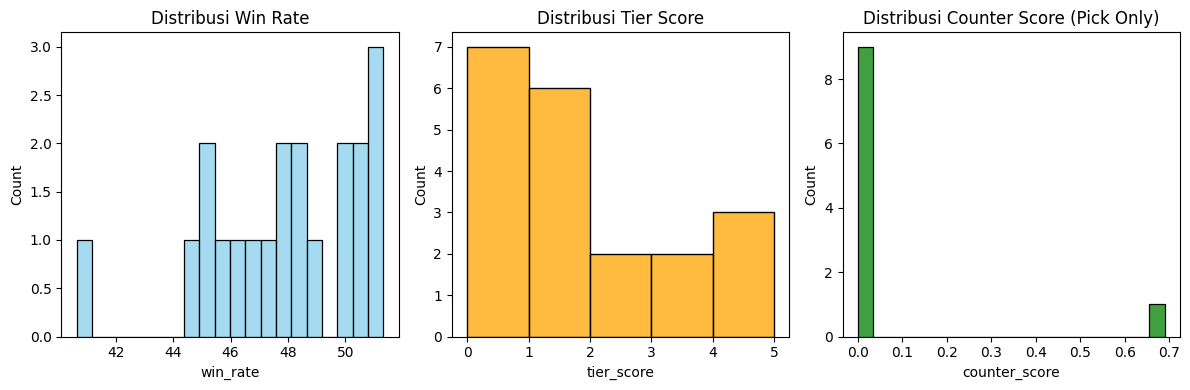

In [9]:
if df_enriched is not None:
    print("🔍 VALIDASI ENRICHMENT (Business Logic):")
    
    # Cek statistik deskriptif untuk kolom numerik penting
    cols_to_check = ['win_rate', 'tier_score', 'counter_score']
    
    print("\nStatistik Deskriptif:")
    display(df_enriched[cols_to_check].describe())
    
    # Visualisasi Cepat: Apakah Counter Score bervariasi?
    # Jika grafiknya hanya satu batang di angka 0, berarti logika hitung score SALAH.
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    sns.histplot(df_enriched['win_rate'], bins=20, color='skyblue')
    plt.title('Distribusi Win Rate')
    
    plt.subplot(1, 3, 2)
    sns.histplot(df_enriched['tier_score'], bins=5, color='orange')
    plt.title('Distribusi Tier Score')
    
    plt.subplot(1, 3, 3)
    # Filter phase pick saja, karena phase ban counter_score pasti 0/null
    pick_only = df_enriched[df_enriched['phase'] == 'pick']
    sns.histplot(pick_only['counter_score'], bins=20, color='green')
    plt.title('Distribusi Counter Score (Pick Only)')
    
    plt.tight_layout()
    plt.show()

In [16]:
print(df_enriched.head())

   match_id region  tournament team_side team_name phase  order  \
0         1     ID  MPL ID S16      left  ONICONIC  pick      1   
1         1     ID  MPL ID S16      left  ONICONIC  pick      2   
2         1     ID  MPL ID S16      left  ONICONIC  pick      3   
3         1     ID  MPL ID S16      left  ONICONIC  pick      4   
4         1     ID  MPL ID S16      left  ONICONIC  pick      5   

  hero_name_normalized  is_winner_team     source_file          ingested_at  \
0                 cici            True  mpl_id_s16.csv  2025-12-20 09:03:18   
1                  joy            True  mpl_id_s16.csv  2025-12-20 09:03:18   
2               pharsa            True  mpl_id_s16.csv  2025-12-20 09:03:18   
3               claude            True  mpl_id_s16.csv  2025-12-20 09:03:18   
4                hylos            True  mpl_id_s16.csv  2025-12-20 09:03:18   

   win_rate  pick_rate  ban_rate        speciality  tier_score    score  \
0     50.31       1.08     23.23     Damage, Re

In [10]:
print("\nStatistik Deskriptif:")
print(df_enriched[cols_to_check].describe())


Statistik Deskriptif:
        win_rate  tier_score  counter_score
count  20.000000   20.000000      20.000000
mean   47.929500    1.450000       0.034500
std     2.757586    1.571958       0.154289
min    40.640000    0.000000       0.000000
25%    46.130000    0.000000       0.000000
50%    48.270000    1.000000       0.000000
75%    50.257500    2.250000       0.000000
max    51.320000    5.000000       0.690000


In [11]:
if df_dq is not None:
    print("🔍 VALIDASI DATA QUALITY:")
    
    # Hitung jumlah isu per tipe
    print("\nJumlah Isu per Kategori:")
    print(df_dq['issue_type'].value_counts())
    
    # Lihat sampel isu HERO_NOT_FOUND
    # Ini memberi tahu kita hero apa yang namanya beda antara MPL vs Master Stats
    print("\nTop 10 Hero yang Gagal Join Stats (Perlu Normalisasi di Silver?):")
    hero_issues = df_dq[df_dq['issue_type'] == 'HERO_NOT_FOUND_IN_MASTER']
    print(hero_issues['hero_name_normalized'].value_counts().head(10))
    
    print("\nContoh Detail Isu:")
    display(df_dq.head(5))
else:
    print("🎉 Data bersih sempurna! Tidak ada isu yang tercatat.")

🎉 Data bersih sempurna! Tidak ada isu yang tercatat.


In [12]:
if df_enriched is not None:
    print("🔍 AUDIT KEKOSONGAN DATA (Zero Check):")
    
    total_rows = len(df_enriched)
    
    # Hitung persentase nilai 0 pada kolom penting
    # Ingat: Kita tadi fillna(0). Jadi 0 bisa berarti "memang 0" atau "datanya hilang".
    
    zero_wr = len(df_enriched[df_enriched['win_rate'] == 0])
    zero_tier = len(df_enriched[df_enriched['tier_score'] == 0])
    
    # Khusus Counter Score, kita hanya peduli pada phase PICK
    pick_rows = df_enriched[df_enriched['phase'] == 'pick']
    zero_counter = len(pick_rows[pick_rows['counter_score'] == 0])
    
    print(f"Total Baris: {total_rows}")
    print(f"1. Win Rate = 0: {zero_wr} baris ({zero_wr/total_rows:.1%}) -> { '⚠️ Bahaya' if (zero_wr/total_rows) > 0.2 else '✅ Aman'}")
    print(f"2. Tier Score = 0: {zero_tier} baris ({zero_tier/total_rows:.1%}) -> { '⚠️ Bahaya' if (zero_tier/total_rows) > 0.2 else '✅ Aman'}")
    print(f"3. Counter Score = 0 (Pick Only): {zero_counter} baris ({zero_counter/len(pick_rows):.1%}) -> { '⚠️ Cek Logika' if (zero_counter/len(pick_rows)) > 0.5 else '✅ Aman'}")

🔍 AUDIT KEKOSONGAN DATA (Zero Check):
Total Baris: 20
1. Win Rate = 0: 0 baris (0.0%) -> ✅ Aman
2. Tier Score = 0: 7 baris (35.0%) -> ⚠️ Bahaya
3. Counter Score = 0 (Pick Only): 9 baris (90.0%) -> ⚠️ Cek Logika


In [15]:
# 1. Load Data Mentah (Bronze)
df_matches = read_df_from_minio(BUCKET_NAME, "bronze/tournament_matches/bronze_mpl_matches.parquet", file_format='parquet')
df_counter = read_df_from_minio(BUCKET_NAME, "bronze/counter_hero/bronze_hero_counter.parquet", file_format='parquet')
df_meta = read_df_from_minio(BUCKET_NAME, "bronze/meta/bronze_hero_meta.parquet", file_format='parquet')

# 2. Investigasi: TIER SCORE (Meta vs Match)
print(f"\n{'='*40}\nKASUS 1: TIER SCORE BANYAK 0\n{'='*40}")

# Ambil sampel nama hero dari Match (Picks)
sample_match_heroes = set()
for picks in df_matches['left_picks_normalized'].head(20):
    if isinstance(picks, list):
        sample_match_heroes.update(picks)

# Ambil sampel nama hero dari Meta
meta_heroes = set(df_meta['hero_name_normalized'].unique())

# Cari Irisan (Yang Cocok) dan Selisih (Yang Gagal)
matched = sample_match_heroes.intersection(meta_heroes)
missing = sample_match_heroes.difference(meta_heroes)

print(f"Total Sampel Hero di Match: {len(sample_match_heroes)}")
print(f"Berhasil Match dengan Meta: {len(matched)}")
print(f"Gagal Match dengan Meta   : {len(missing)}")

if len(missing) > 0:
    print("\n⚠️ DAFTAR HERO YANG GAGAL JOIN KE META (Perhatikan Ejaannya!):")
    print(list(missing)[:10])
    
    print("\nVS Ejaan yang ada di Meta (Cari yang mirip):")
    # Cari nama di meta yang mirip dengan yang hilang (misal 'yi' ada di mana?)
    for m in missing:
        similar = [h for h in meta_heroes if m[:3] in h] # Cek 3 huruf depan
        print(f"   Match: '{m}'  <--> Meta punya: {similar}")
else:
    print("✅ Semua nama hero Match ada di Meta. Aneh jika Tier Score 0.")

# 3. Investigasi: COUNTER SCORE (Counter vs Match)
print(f"\n{'='*40}\nKASUS 2: COUNTER SCORE BANYAK 0\n{'='*40}")

# Buat Dictionary Counter (Persis seperti di kode silver)
counter_dict = {}
if df_counter is not None:
    for t, c, s in zip(df_counter['hero_name_normalized'], df_counter['counter_name_normalized'], df_counter['score']):
        counter_dict[(t, c)] = s

print(f"Jumlah Rules di Counter Dictionary: {len(counter_dict)}")

# Ambil 1 Match untuk simulasi
row = df_matches.iloc[0]
left_heroes = row['left_picks_normalized'] # Misal: ['cici', 'joy', ...]
right_heroes = row['right_picks_normalized'] # Misal: ['esmeralda', ...]

print(f"\nSimulasi Match ID 1:")
print(f"Tim Kiri (Hero Kita) : {left_heroes}")
print(f"Tim Kanan (Musuh)    : {right_heroes}")

print("\n--- Simulasi Lookup Satu per Satu ---")
# Kita coba hitung manual
hero_kita = left_heroes[0] # Ambil hero pertama
print(f"Hero yang dicek: '{hero_kita}'")

for musuh in right_heroes:
    key = (hero_kita, musuh)
    
    # Cek apakah key ada di dictionary
    is_found = key in counter_dict
    score = counter_dict.get(key, 0.0)
    
    status = "✅ KETEMU" if is_found else "❌ TIDAK KETEMU"
    print(f"   Lawan '{musuh}': Key={key} -> {status} (Score: {score})")
    
    if not is_found:
        # Coba debug kenapa tidak ketemu
        # Cek apakah hero kita ada sama sekali di dictionary sebagai target?
        ada_di_target = any(k[0] == hero_kita for k in counter_dict.keys())
        ada_di_counter = any(k[1] == musuh for k in counter_dict.keys())
        print(f"      -> Diagnosa: '{hero_kita}' ada di data counter? {ada_di_target}")
        print(f"      -> Diagnosa: '{musuh}' ada di data counter? {ada_di_counter}")


KASUS 1: TIER SCORE BANYAK 0
Total Sampel Hero di Match: 0
Berhasil Match dengan Meta: 0
Gagal Match dengan Meta   : 0
✅ Semua nama hero Match ada di Meta. Aneh jika Tier Score 0.

KASUS 2: COUNTER SCORE BANYAK 0
Jumlah Rules di Counter Dictionary: 1435

Simulasi Match ID 1:
Tim Kiri (Hero Kita) : ['cici' 'joy' 'pharsa' 'claude' 'hylos']
Tim Kanan (Musuh)    : ['esmeralda' 'lancelot' 'helcurt' 'harith' 'gatotkaca']

--- Simulasi Lookup Satu per Satu ---
Hero yang dicek: 'cici'
   Lawan 'esmeralda': Key=('cici', 'esmeralda') -> ❌ TIDAK KETEMU (Score: 0.0)
      -> Diagnosa: 'cici' ada di data counter? True
      -> Diagnosa: 'esmeralda' ada di data counter? True
   Lawan 'lancelot': Key=('cici', 'lancelot') -> ❌ TIDAK KETEMU (Score: 0.0)
      -> Diagnosa: 'cici' ada di data counter? True
      -> Diagnosa: 'lancelot' ada di data counter? True
   Lawan 'helcurt': Key=('cici', 'helcurt') -> ❌ TIDAK KETEMU (Score: 0.0)
      -> Diagnosa: 'cici' ada di data counter? True
      -> Diagnosa